# Psychoinformatics - Week 16 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

## 1 Audio Processing

In [5]:
#!conda install -c omnia hmmlearn 
!pip install simplejson eyed3 pydub python-magic-bin==0.4.14 # needed by pyAudioAnalysis
!pip install pyaudioanalysis

  Using cached https://files.pythonhosted.org/packages/e3/24/c35fb1c1c315fc0fffe61ea00d3f88e85469004713dab488dee4f35b0aff/simplejson-3.16.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/b9/43/bdd79ced1e7496d0a5f22b1c5c750e006d5f6931ba979235150ac819c052/eyeD3-0.8.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2f/73/bb9c093882d647437a9e6e87c7e6592d2df852f83ffac6f348b878979be0/pydub-0.23.0-py2.py3-none-any.whl
  Could not find a version that satisfies the requirement python-magic-bin (from versions: )
No matching distribution found for python-magic-bin
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.1 Audio Signals

In [8]:
#!pip install librosa
import librosa
import librosa.display

#### 1.1.1 Synthesized

In [9]:
# Signal consturction:

sampleRate = 44100 # sampling frequency (Hz)
frequency = 200 # tone frequency (Hz)
doremi = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25] # tone frequency (Hz)
length = 1 # tone duration (second)

t = np.linspace(start=0, stop=length, num=sampleRate*length+1)  #  Produces a 1 second Audio-File
y = np.sin(frequency * (2*np.pi) * t)  #  Has frequency of 440Hz
#y = np.concatenate([np.sin(freq*2*np.pi*t) for freq in doremi])

ipd.Audio(y,rate=sampleRate)

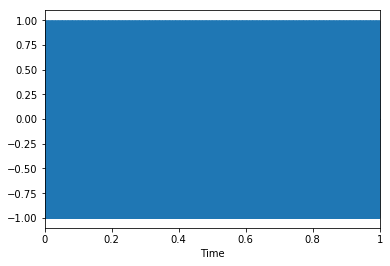

In [10]:
# Signal Visualization:
librosa.display.waveplot(y, sampleRate);

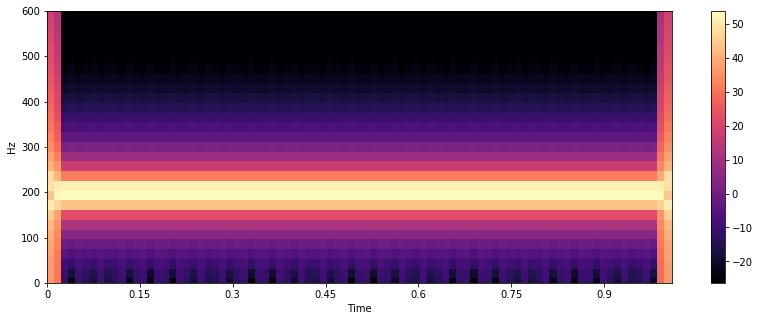

In [11]:
# Show Spectrogram:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sampleRate, x_axis='time', y_axis='hz');
plt.ylim([0,600]); plt.colorbar();

#### 1.1.2 Real-world signals
WAV formats are described <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#r7015bff88555-1">here</a>.

In [18]:
y, sr = librosa.load('happy/53_F_H_6.wav', sr=None, mono=True) # sr=none: ‘None’ uses the native sampling rate, mono=True 單聲道
print(sr, y.shape, y.dtype)

44100 (196608,) float32


In [22]:
ipd.Audio(y,rate=sr)

1

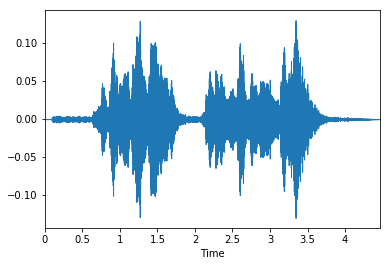

In [55]:
# Time domain:
#librosa.display.waveplot(y, sr);
#librosa.display.waveplot(y[split_y[0]], sr);
librosa.display.waveplot(y, sr);

In [ ]:
split_y=librosa.effects.split(y, top_db=25)


In [71]:
split_y.shape[0]
#librosa.display.waveplot(y[split_y[0][0]:split_y[0][1]], sr);

2

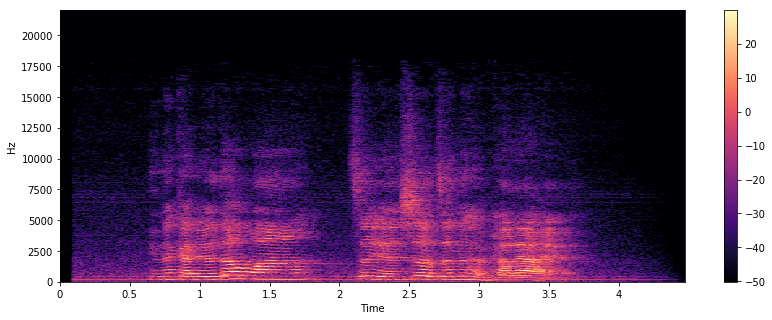

In [297]:
# Spectrogram:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(YYdb, sr=sampleRate, x_axis='time', y_axis='hz');
plt.colorbar();

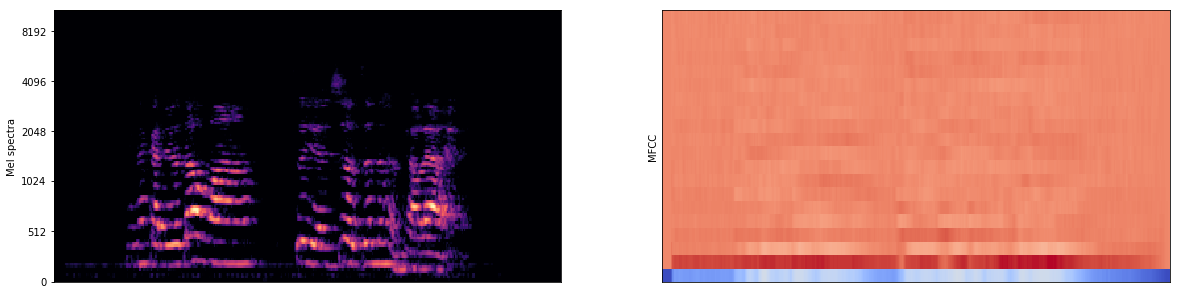

In [298]:
# Cepstrum & Spectral Features:

M = librosa.feature.melspectrogram(y=y, sr=sr)
MFCC = librosa.feature.mfcc(y=y, sr=sr)

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(M), y_axis='mel')
plt.ylabel('Mel spectra');
plt.subplot(1,2,2)
librosa.display.specshow(MFCC)
plt.ylabel('MFCC');

### 1.2 Machine Learning

In [ ]:
#!conda install -c omnia hmmlearn 
#!pip install simplejson eyed3 pydub python-magic-bin==0.4.14 # needed by pyAudioAnalysis
#!pip install pyaudioanalysis

#### 1.2.1 Emotion Classification


In [335]:
# Training:

from pyAudioAnalysis import audioTrainTest as aT
aT.featureAndTrain(["speech/anger","speech/happy"], 2.0, 2.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svm2emotions")

Analyzing file 1 of 10: speech/anger/52_M_A_8.wav
Analyzing file 2 of 10: speech/anger/54_F_A_1.wav
Analyzing file 3 of 10: speech/anger/54_M_A_9.wav
Analyzing file 4 of 10: speech/anger/55_F_A_3.wav
Analyzing file 5 of 10: speech/anger/56_F_A_9.wav
Analyzing file 6 of 10: speech/anger/60_F_A_8.wav
Analyzing file 7 of 10: speech/anger/60_F_A_8_2.wav
Analyzing file 8 of 10: speech/anger/60_M_A_7.wav
Analyzing file 9 of 10: speech/anger/62_F_A_9.wav
Analyzing file 10 of 10: speech/anger/65_M_A_8.wav
Feature extraction complexity ratio: 34.1 x realtime
Analyzing file 1 of 10: speech/happy/51_F_H_6.wav
Analyzing file 2 of 10: speech/happy/53_F_H_6.wav
Analyzing file 3 of 10: speech/happy/56_F_H_7.wav
Analyzing file 4 of 10: speech/happy/59_F_H_7.wav
Analyzing file 5 of 10: speech/happy/62_F_H_6.wav
Analyzing file 6 of 10: speech/happy/66_F_H_6.wav
Analyzing file 7 of 10: speech/happy/68_M_H_6.wav
Analyzing file 8 of 10: speech/happy/69_M_H_7.wav
Analyzing file 9 of 10: speech/happy/74_F_H_

Param = 0.50000 - classifier Evaluation Experiment 38 of 100
Param = 0.50000 - classifier Evaluation Experiment 39 of 100
Param = 0.50000 - classifier Evaluation Experiment 40 of 100
Param = 0.50000 - classifier Evaluation Experiment 41 of 100
Param = 0.50000 - classifier Evaluation Experiment 42 of 100
Param = 0.50000 - classifier Evaluation Experiment 43 of 100
Param = 0.50000 - classifier Evaluation Experiment 44 of 100
Param = 0.50000 - classifier Evaluation Experiment 45 of 100
Param = 0.50000 - classifier Evaluation Experiment 46 of 100
Param = 0.50000 - classifier Evaluation Experiment 47 of 100
Param = 0.50000 - classifier Evaluation Experiment 48 of 100
Param = 0.50000 - classifier Evaluation Experiment 49 of 100
Param = 0.50000 - classifier Evaluation Experiment 50 of 100
Param = 0.50000 - classifier Evaluation Experiment 51 of 100
Param = 0.50000 - classifier Evaluation Experiment 52 of 100
Param = 0.50000 - classifier Evaluation Experiment 53 of 100
Param = 0.50000 - classi

Param = 5.00000 - classifier Evaluation Experiment 76 of 100
Param = 5.00000 - classifier Evaluation Experiment 77 of 100
Param = 5.00000 - classifier Evaluation Experiment 78 of 100
Param = 5.00000 - classifier Evaluation Experiment 79 of 100
Param = 5.00000 - classifier Evaluation Experiment 80 of 100
Param = 5.00000 - classifier Evaluation Experiment 81 of 100
Param = 5.00000 - classifier Evaluation Experiment 82 of 100
Param = 5.00000 - classifier Evaluation Experiment 83 of 100
Param = 5.00000 - classifier Evaluation Experiment 84 of 100
Param = 5.00000 - classifier Evaluation Experiment 85 of 100
Param = 5.00000 - classifier Evaluation Experiment 86 of 100
Param = 5.00000 - classifier Evaluation Experiment 87 of 100
Param = 5.00000 - classifier Evaluation Experiment 88 of 100
Param = 5.00000 - classifier Evaluation Experiment 89 of 100
Param = 5.00000 - classifier Evaluation Experiment 90 of 100
Param = 5.00000 - classifier Evaluation Experiment 91 of 100
Param = 5.00000 - classi

In [334]:
# Testing:

from glob import glob
files=glob('speech/anger/*.wav')
for file in files:
    print(file,aT.fileClassification(file, "svm2emotions","svm"))
print('-'*100)
files=glob('speech/happy/*.wav')
for file in files:
    print(file,aT.fileClassification(file, "svm2emotions","svm"))

speech/anger/55_F_A_3.wav (1.0, array([0.42430879, 0.57569121]), ['anger', 'happy'])
speech/anger/56_F_A_9.wav (0.0, array([0.82496851, 0.17503149]), ['anger', 'happy'])
speech/anger/65_M_A_8.wav (0.0, array([0.82509143, 0.17490857]), ['anger', 'happy'])
speech/anger/60_M_A_7.wav (0.0, array([0.71387761, 0.28612239]), ['anger', 'happy'])
speech/anger/54_F_A_1.wav (0.0, array([0.70118004, 0.29881996]), ['anger', 'happy'])
speech/anger/62_F_A_9.wav (0.0, array([0.82504497, 0.17495503]), ['anger', 'happy'])
speech/anger/52_M_A_8.wav (0.0, array([0.75234556, 0.24765444]), ['anger', 'happy'])
speech/anger/60_F_A_8_2.wav (0.0, array([0.65622753, 0.34377247]), ['anger', 'happy'])
speech/anger/60_F_A_8.wav (0.0, array([0.82498274, 0.17501726]), ['anger', 'happy'])
speech/anger/54_M_A_9.wav (0.0, array([0.70158492, 0.29841508]), ['anger', 'happy'])
----------------------------------------------------------------------------------------------------
speech/happy/51_F_H_6.wav (1.0, array([0.164037

#### 1.2.2 Regression

In [345]:
# Training:
aT.featureAndTrainRegression("speech/anger", 1, 1, aT.shortTermWindow, aT.shortTermStep, "svm", "svmAnger")
aT.featureAndTrainRegression("speech/happy", 1, 1, aT.shortTermWindow, aT.shortTermStep, "svm", "svmHappy")

Analyzing file 1 of 10: speech/anger/52_M_A_8.wav
Analyzing file 2 of 10: speech/anger/54_F_A_1.wav
Analyzing file 3 of 10: speech/anger/54_M_A_9.wav
Analyzing file 4 of 10: speech/anger/55_F_A_3.wav
Analyzing file 5 of 10: speech/anger/56_F_A_9.wav
Analyzing file 6 of 10: speech/anger/60_F_A_8.wav
Analyzing file 7 of 10: speech/anger/60_F_A_8_2.wav
Analyzing file 8 of 10: speech/anger/60_M_A_7.wav
Analyzing file 9 of 10: speech/anger/62_F_A_9.wav
Analyzing file 10 of 10: speech/anger/65_M_A_8.wav
Feature extraction complexity ratio: 33.6 x realtime
Regression task valence
Param		MSE		T-MSE		R-MSE
0.0010		5.38		1.60		5.88
0.0050		8.17		1.33		8.65
0.0100		9.01		1.07		10.11
0.0500		7.18		0.19		9.46
0.1000		6.76		0.10		9.69
0.2500		4.01		0.10		6.32
0.5000		3.71		0.10		5.99		 best
1.0000		6.93		0.10		10.14
5.0000		5.69		0.10		8.53
10.0000		4.90		0.10		7.27
Selected params: 0.50000
Analyzing file 1 of 10: speech/happy/51_F_H_6.wav
Analyzing file 2 of 10: speech/happy/53_F_H_6.wav
Analyzing 

([0.24880997966091975], [0.2913580246913583], [10.0])

In [346]:
# Testing:
from glob import glob
files=glob('speech/anger/*.wav')
for file in files:
    print(file,aT.fileRegression(file,"svmAnger","svm"))
print('-'*100)
files=glob('speech/happy/*.wav')
for file in files:
    print(file,aT.fileRegression(file,"svmHappy","svm"))

speech/anger/55_F_A_3.wav ([3.1000207666651844], ['valence'])
speech/anger/56_F_A_9.wav ([8.899665623326793], ['valence'])
speech/anger/65_M_A_8.wav ([8.100266597681877], ['valence'])
speech/anger/60_M_A_7.wav ([6.900084035588623], ['valence'])
speech/anger/54_F_A_1.wav ([1.099743369076938], ['valence'])
speech/anger/62_F_A_9.wav ([8.899974820417414], ['valence'])
speech/anger/52_M_A_8.wav ([7.900273597582243], ['valence'])
speech/anger/60_F_A_8_2.wav ([7.899709625563107], ['valence'])
speech/anger/60_F_A_8.wav ([7.899988013664247], ['valence'])
speech/anger/54_M_A_9.wav ([8.900273589616578], ['valence'])
----------------------------------------------------------------------------------------------------
speech/happy/51_F_H_6.wav ([6.099708542287064], ['valence'])
speech/happy/68_M_H_6.wav ([6.099806008014085], ['valence'])
speech/happy/62_F_H_6.wav ([6.099669394287093], ['valence'])
speech/happy/56_F_H_7.wav ([6.900292112302259], ['valence'])
speech/happy/69_M_H_7.wav ([6.900050422782

#### 1.2.3 Segmentation

In [368]:
from pyAudioAnalysis import audioSegmentation as aS
aS.mtFileClassification("53_F_H_6.wav", "svm2emotions", "svm")

(array([1., 1., 0.]), ['anger', 'happy'], -1, [])

#### 1.2.4 Revisiting Emotion Classification using CNN
Here is an example from <a href="https://blog.manash.me/building-a-dead-simple-word-recognition-engine-using-convnet-in-keras-25e72c19c12b">this article</a>.

In [469]:
import os
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

DATA_PATH='./speech/'

def wav2mfcc(file_path, max_pad_len=130):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000)
    pad_width = max_pad_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    mfcc /= np.max(X_train) # rescale to [-1,1]
    mfcc2 = mfcc.reshape(np.append(mfcc.shape,1)) # add the depth dimension
    return mfcc2

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

def save_data_to_array(path=DATA_PATH, max_pad_len=130):
    labels, _, _ = get_labels(path)
    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []

        wavfiles = glob('speech/'+label+'/*.wav')
        for wavfile in wavfiles:
            mfcc = wav2mfcc(wavfile, max_pad_len=max_pad_len)
            mfcc_vectors.append(mfcc)
        np.save(label + '.npy', mfcc_vectors)
        
def get_train_test(split_ratio=1.0, random_state=42):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)

    # Getting first arrays
    X = np.load(labels[0] + '.npy')
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [470]:
# Data preprocessing:
save_data_to_array()

X_train, X_test, Y_train, Y_test = get_train_test()
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
Y_train_hot = to_categorical(Y_train) # 1-hot encoding
print(X_train.shape, Y_train_hot.shape)

(20, 20, 130, 1) (0, 20, 130, 1) (20,) (0,)
(20, 20, 130, 1) (20, 2)


In [471]:
# Build the CNN model:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(20, 130, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 19, 129, 32)       160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 9, 64, 32)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 9, 64, 32)         0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                589856    
_________________________________________________________________
dropout_34 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 66        
Total para

In [472]:
# Training:

model.fit(X_train, Y_train_hot, batch_size=5, epochs=20, verbose=1)

Epoch 1/20
20/20 [==============================] - 1s 54ms/step - loss: 0.7053 - acc: 0.5500
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.6233 - acc: 0.7000
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5996 - acc: 0.7000
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5185 - acc: 0.6500
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4126 - acc: 0.7500
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3964 - acc: 0.8500
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3145 - acc: 0.9500
Epoch 8/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2107 - acc: 0.9500
Epoch 9/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2932 - acc: 0.8500
Epoch 10/20
20/20 [==============================] - 0s 3ms/step - loss: 0.1900 - acc: 0.9500
Epoch 11/20
20/20 [==============================] - 0s 4ms/step - l

In [485]:
# Testing:

print(get_labels())
print('-'*100)
X = np.load('happy.npy')
print(np.round(model.predict(X)))
print('-'*100)
X = np.load('anger.npy')
print(np.round(model.predict(X)))

(['happy', 'anger'], array([0, 1]), array([[1., 0.],
       [0., 1.]], dtype=float32))
----------------------------------------------------------------------------------------------------
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
----------------------------------------------------------------------------------------------------
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## 2 Speech Processing

In [76]:
#!pip install SpeechRecognition google-api-python-client
import speech_recognition as sr

### 2.1 Offline Speech Recognition (file)

In [114]:
r=sr.Recognizer()
s = sr.AudioFile('53_F_H_6.wav')
with s as source:
    audio = r.record(source)

In [115]:
r.recognize_google(audio,language='zh-TW',show_all=True)

{'alternative': [{'transcript': '要嗎這個真的很漂亮耶', 'confidence': 0.85306758},
  {'transcript': '到嗎這真的很漂亮耶'},
  {'transcript': '到嗎這個真的很漂亮耶'},
  {'transcript': '有嗎這個真的很漂亮耶'},
  {'transcript': '那個嗎這個真的很漂亮耶'}],
 'final': True}

In [138]:
with s as source:
    audio1 = r.record(source,duration=2)
    audio2 = r.record(source,duration=2)
    
print(r.recognize_google(audio1,language='zh-TW'))
print(r.recognize_google(audio2,language='zh-TW'))

到嗎
這真的很漂亮耶


### 2.2 Online Speech Recognition (microphone)

In [139]:
with sr.Microphone() as source:
    print("Please wait. Calibrating microphone...") 
    #listen for 2 seconds and create the ambient noise energy level 
    r.adjust_for_ambient_noise(source, duration=2) 
    print("Say something!")
    audio=r.listen(source)
    
try:
    print(r.recognize_google(audio, language="zh-TW"))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("No response from Google Speech Recognition service: {0}".format(e))

Please wait. Calibrating microphone...
Say something!
這是一個測試


### 2.3 Speech Synthesis

In [151]:
#!pip install gTTS
from gtts import gTTS
from pygame import mixer

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [170]:
filename='test.mp3'
tts=gTTS(text='貨出得去,人進得來', lang='zh-TW')
tts.save(filename)
mixer.init()
mixer.music.load(filename)
mixer.music.play()